# **Stock Prices Predictions with Machine Learning**

This Notebook will contain all the data engineering, the data analysis and the modeling phases needed to predict stock prices using a deep learning model.
The stocks analyzed will be the following:
* IBM
* AAPL (Apple Inc.)
* AMZN (Amazon Inc.)
* GOOGL (Alphabet Inc.)
The model will be


A couple of sources will be used to gather the dataset.

## Data gathering

Gatering data from two sources:
* Alpha Vantage API
* Yahoo Finance

In [1]:
# pandas_datareader is a library used to interface with Alpha Vantage APIs
#import pandas_datareader.data as web

# using https://github.com/RomelTorres/alpha_vantage alpha_vantage python APIs
import alpha_vantage.timeseries as av_ts

Target symbols:

In [2]:
ibm = 'IBM' 
aapl = 'AAPL'
amzn = 'AMZN'
googl = 'GOOGL'

Setting dataset record start date and end date:
* start will be just set to 1st Genuary 1900, in order to retrieve the logest possible time series from both sources
* end time will be today date

In [3]:
import datetime

In [4]:
start = datetime.datetime(1900, 1, 1)
end = datetime.date.today()

### Gatering data from Alpha Vantage API

In [5]:
ts = av_ts.TimeSeries(key="os.getenv('ALPHAVANTAGE_API_KEY')", output_format='pandas')

Retrieving symbols data from AlphaVantage DB

#### ***IBM*** data:

In [6]:
df_av_ibm, ibm_meta_data = ts.get_daily_adjusted(symbol=ibm, outputsize='full')

In [8]:
ibm_meta_data

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2021-01-29',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

#### ***Apple Inc.*** data:

In [9]:
df_av_aapl, aapl_meta_data = ts.get_daily_adjusted(symbol=aapl, outputsize='full')

In [11]:
aapl_meta_data

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2021-01-29',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

#### ***Amazon.com Inc.*** data:

In [12]:
df_av_amzn, amzn_meta_data = ts.get_daily_adjusted(symbol=amzn, outputsize='full')

In [14]:
amzn_meta_data

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'AMZN',
 '3. Last Refreshed': '2021-01-29',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

#### ***Alphabet Inc.*** data:

In [15]:
df_av_googl, googl_meta_data = ts.get_daily_adjusted(symbol=googl, outputsize='full')

In [17]:
googl_meta_data

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'GOOGL',
 '3. Last Refreshed': '2021-01-29',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

## Gathering data from Yahoo! Finance

Data from Yahoo! Finance are provided in a straight order pandas dataframe (first record first). This means that the data in it will be in reverse order respect to the Alpha Vantage API provided data order.

In [79]:
# yfinance is a Yahoo! Finance market data downloader,
# that allows to access Yahoo finance data after Yahoo
# has discontinued support for this API
import yfinance as yf

#### ***IBM*** data:

In [19]:
df_yf_ibm = yf.download(ibm, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


#### ***Apple Inc.*** data:

In [21]:
df_yf_aapl = yf.download(aapl, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


#### ***Amazon.com Inc.*** data:

In [85]:
df_yf_amzn = yf.download(amzn, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


#### ***Alphabet Inc.*** data:

In [88]:
df_yf_googl = yf.download(googl, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


## EDA

This section contains an exploratory data analysis on the dataset. This will allow to to have a more clean view of the source data features dynamics over time and to spot possible patterns in data, if any.

### Data soureces comparison:

First off, comparing data from the two sources would allow to take a usage strategy.

#### ***IBM*** data:

Newest data available:

In [95]:
df_av_ibm.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-01-29,120.2200,121.300,118.9000,119.11,119.11,11825496.0,0.0,1.0
2021-01-28,122.8000,123.200,120.0700,120.08,120.08,8084051.0,0.0,1.0
2021-01-27,122.0800,124.790,121.6214,122.47,122.47,12146541.0,0.0,1.0
2021-01-26,119.1800,122.590,118.4200,122.49,122.49,10694708.0,0.0,1.0
2021-01-25,118.7624,119.538,117.4500,118.58,118.58,13686391.0,0.0,1.0


In [96]:
df_yf_ibm.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-25,118.760002,119.540001,117.449997,118.580002,118.580002,13686400
2021-01-26,119.180000,122.589996,118.419998,122.489998,122.489998,10694700
2021-01-27,122.080002,124.790001,121.620003,122.470001,122.470001,12146500
2021-01-28,122.800003,123.199997,120.070000,120.080002,120.080002,8084100
2021-01-29,120.220001,121.300003,118.900002,119.110001,119.110001,11772300


Oldest data available:

In [97]:
df_av_ibm.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
1999-11-05,92.75,92.94,90.19,90.25,57.400979,13737600.0,0.0,1.0
1999-11-04,94.44,94.44,90.00,91.56,58.234168,16697600.0,0.0,1.0
1999-11-03,95.87,95.94,93.50,94.37,60.021389,10369100.0,0.0,1.0
1999-11-02,96.75,96.81,93.69,94.81,60.301239,11105400.0,0.0,1.0
1999-11-01,98.50,98.81,96.37,96.75,61.535122,9551800.0,0.0,1.0


In [98]:
df_yf_ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.883074,390000
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.899533,292500
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.880603,262500
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.843568,367500
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.809002,547500


#### ***Apple Inc.*** data:

Newest data available:

In [99]:
df_av_aapl.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-01-29,135.83,136.74,130.21,131.96,131.96,177523812.0,0.0,1.0
2021-01-28,139.52,141.99,136.70,137.09,137.09,142621128.0,0.0,1.0
2021-01-27,143.43,144.30,140.41,142.06,142.06,140843759.0,0.0,1.0
2021-01-26,143.60,144.30,141.37,143.16,143.16,98390555.0,0.0,1.0
2021-01-25,143.07,145.09,136.54,142.92,142.92,157611713.0,0.0,1.0


In [100]:
df_yf_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157611700
2021-01-26,143.600006,144.300003,141.369995,143.160004,143.160004,98390600
2021-01-27,143.429993,144.300003,140.410004,142.059998,142.059998,140843800
2021-01-28,139.520004,141.990005,136.699997,137.089996,137.089996,142621100
2021-01-29,135.830002,136.740005,130.210007,131.960007,131.960007,177180600


Oldest data available:

In [101]:
df_av_aapl.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
1999-11-05,84.62,88.37,84.00,88.31,0.680100,3721500.0,0.0,1.0
1999-11-04,82.06,85.37,80.62,83.62,0.643981,3384700.0,0.0,1.0
1999-11-03,81.62,83.25,81.00,81.50,0.627654,2932700.0,0.0,1.0
1999-11-02,78.00,81.69,77.31,80.25,0.618028,3564600.0,0.0,1.0
1999-11-01,80.00,80.69,77.37,77.62,0.597773,2487300.0,0.0,1.0


In [102]:
df_yf_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101073,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095800,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088768,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090965,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093603,73449600


#### ***Amazon.com Inc.*** data:

Newest data available:

In [103]:
df_av_amzn.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-01-29,3230.0000,3236.99,3184.5500,3206.20,3206.20,4293556.0,0.0,1.0
2021-01-28,3235.0400,3301.68,3228.6900,3237.62,3237.62,3149228.0,0.0,1.0
2021-01-27,3341.4900,3346.52,3207.0800,3232.58,3232.58,4660158.0,0.0,1.0
2021-01-26,3296.3559,3338.00,3282.8700,3326.13,3326.13,2955235.0,0.0,1.0
2021-01-25,3328.5000,3363.89,3243.1463,3294.00,3294.00,3749758.0,0.0,1.0


In [104]:
df_yf_amzn.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-25,3328.500000,3363.889893,3243.149902,3294.000000,3294.000000,3749800
2021-01-26,3296.360107,3338.000000,3282.870117,3326.129883,3326.129883,2955200
2021-01-27,3341.489990,3346.520020,3207.080078,3232.580078,3232.580078,4660200
2021-01-28,3235.040039,3301.679932,3228.689941,3237.620117,3237.620117,3149200
2021-01-29,3230.000000,3236.989990,3184.550049,3206.199951,3206.199951,4285600


Oldest data available:

In [105]:
df_av_amzn.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
1999-11-05,64.75,65.50,62.25,64.94,64.94,11091400.0,0.0,1.0
1999-11-04,67.19,67.19,61.00,63.06,63.06,16759200.0,0.0,1.0
1999-11-03,68.19,68.50,65.00,65.81,65.81,10772100.0,0.0,1.0
1999-11-02,69.75,70.00,65.06,66.44,66.44,13243200.0,0.0,1.0
1999-11-01,68.06,71.88,66.31,69.13,69.13,12824100.0,0.0,1.0


In [106]:
df_yf_amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


#### ***Alphabet Inc.*** data:

Newest data available:

In [16]:
df_av_googl.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-01-29,1834.02,1847.535,1801.5601,1827.36,1827.36,2226509.0,0.0,1.0
2021-01-28,1831.00,1887.990,1831.0000,1853.20,1853.20,2763905.0,0.0,1.0
2021-01-27,1874.91,1880.470,1797.2800,1818.94,1818.94,4125631.0,0.0,1.0
2021-01-26,1885.99,1915.750,1876.1300,1907.95,1907.95,1573078.0,0.0,1.0
2021-01-25,1912.74,1921.820,1859.1600,1894.28,1894.28,2529346.0,0.0,1.0


In [89]:
df_yf_googl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-25,1912.739990,1921.819946,1859.160034,1894.280029,1894.280029,2529300
2021-01-26,1885.989990,1915.750000,1876.130005,1907.949951,1907.949951,1573100
2021-01-27,1874.910034,1880.469971,1797.280029,1818.939941,1818.939941,4125600
2021-01-28,1831.000000,1887.989990,1831.000000,1853.199951,1853.199951,2763900
2021-01-29,1834.020020,1847.540039,1801.560059,1827.359985,1827.359985,2225200


Oldest data available:

In [78]:
df_av_googl.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2004-08-25,104.76,108.00,103.88,106.000,53.164113,9188600.0,0.0,1.0
2004-08-24,111.24,111.60,103.57,104.870,52.597363,15247300.0,0.0,1.0
2004-08-23,110.76,113.48,109.05,109.400,54.869377,18256100.0,0.0,1.0
2004-08-20,101.01,109.08,100.50,108.310,54.322689,22834300.0,0.0,1.0
2004-08-19,100.01,104.06,95.96,100.335,50.322842,44659000.0,0.0,1.0


In [90]:
df_yf_googl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


### Conclusions and data sources selection

We can spot some differences in the two data sources:
* Alpha Vantage oldest data records date all back to November 5th, 1999.
* Alpha Vantage presents unadjusted data for all features, except for "5. adjusted close". This could be something good or bad, we'll se later in the analysis. 
* Yahoo! Finance oldest data records date back way further.
* Alpha Vantage and Yahoo! Finance data are presented in reverse order respect each ohter. 

First strategy in data selection will be the following:
Use Yahoo! Finance source for all the stocks.
For *Alphabet Inc.* whose stock exchange entrance date is so recent (Alphabet has gone public in August 2004 source: ), that the same amount of records available on Alpha Vantage about this stock. Alpha Vantage dataset will be then also used to train an alternate model on *Alphabet Inc.* stock.

In [107]:
df_ibm = df_yf_ibm

In [108]:
df_aapl = df_yf_aapl

In [109]:
df_amzn = df_yf_amzn

In [110]:
df_googl = df_yf_googl

## Data visualization

Some data visualization will help to spot data dynamics.

In [116]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

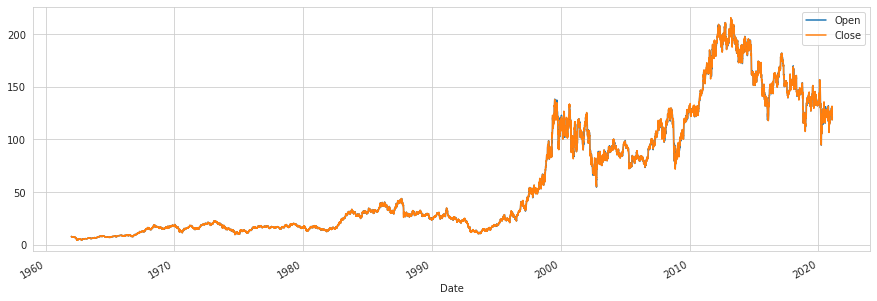

In [125]:
df_ibm[['Open', 'Close']].plot(legend=True,figsize=(15,5))

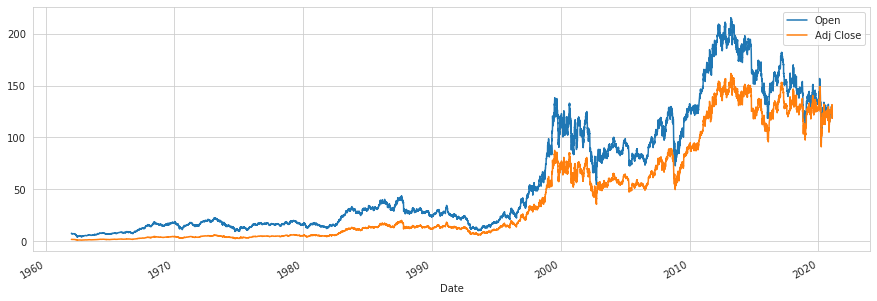

In [124]:
df_ibm[['Open', 'Adj Close']].plot(legend=True,figsize=(15,5))

Checking for inter-features correlation:

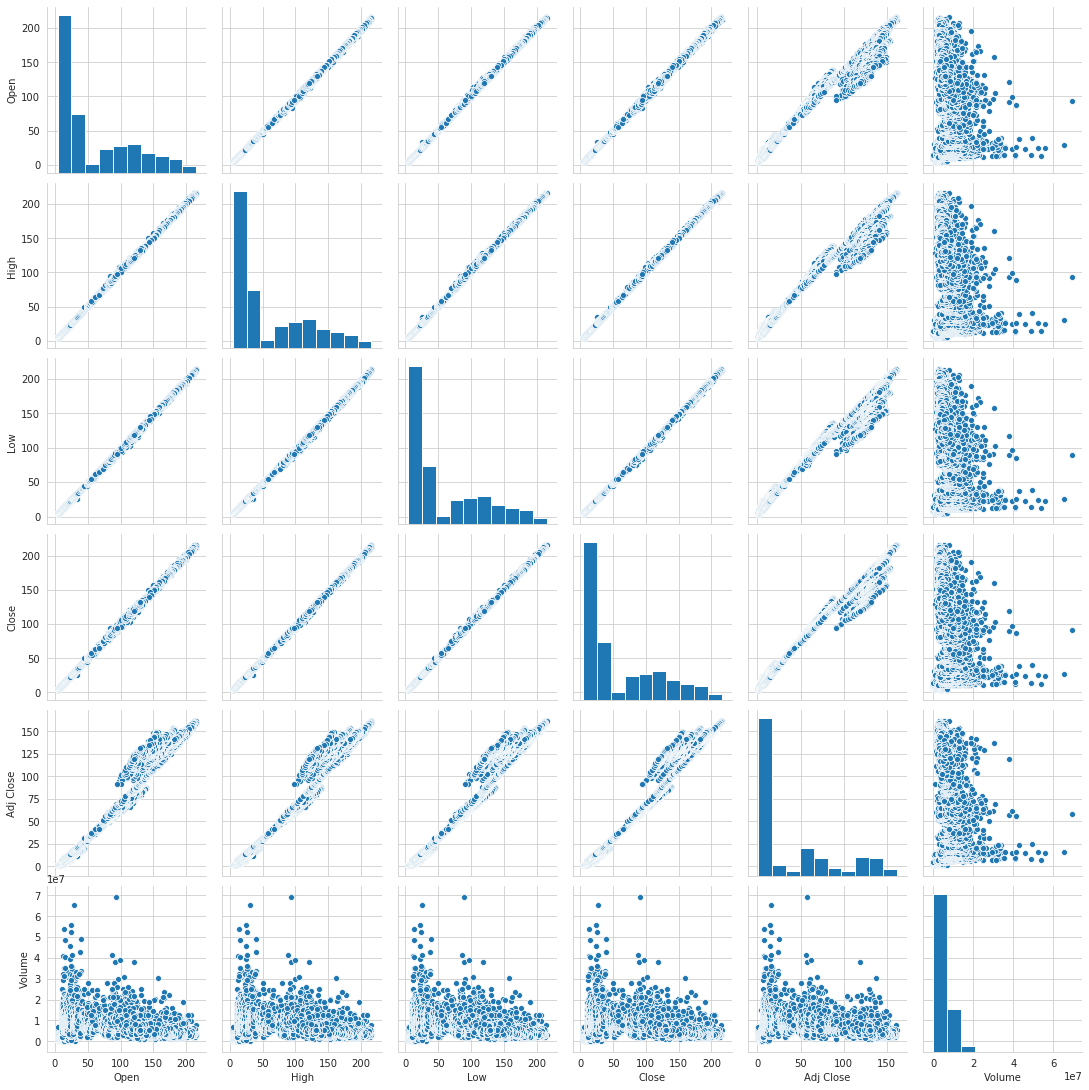

In [126]:
sns.pairplot(df_ibm)

In [127]:
# Compute the correlation matrix
df_ibm_corr = df_ibm.corr()

In [128]:
import numpy as np

In [130]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_ibm_corr, dtype=bool))

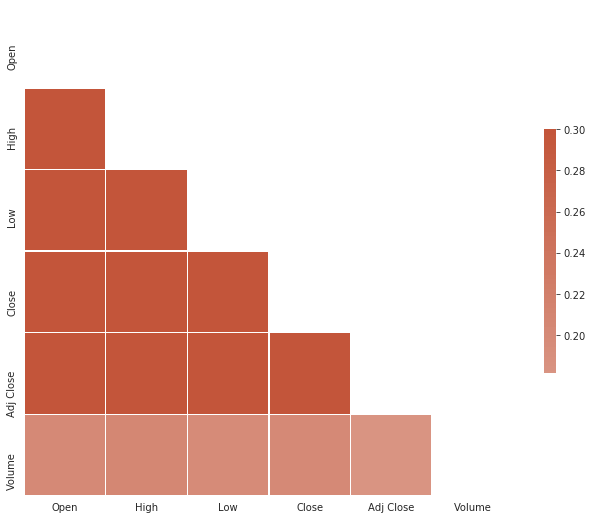

In [133]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_ibm_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Nominally, the Volume feature has a lower correlation with the other feature, but, in reality, it contains very useful data, from the moment that we know that Open, High, Low and Close value are all mostly linearly correlated to Adj Close value (our target feature). From what we can see in the pairplot, we can expect the volume to be pretty high when the value of the stock is low and to be high when the value of the stock is high. 

Alpha Vantage data:

In [27]:
df_av_ibm_ac = df_av_ibm['5. adjusted close']

In [28]:
df_av_aapl_ac = df_av_aapl['5. adjusted close']

In [30]:
df_av_amzn_ac = df_av_amzn['5. adjusted close']

In [29]:
df_av_googl_ac = df_av_googl['5. adjusted close']

In [43]:
df_av_adj_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5346 entries, 1999-11-01 to 2021-01-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBM     5346 non-null   float64
 1   AAPL    5346 non-null   float64
 2   AMZN    5346 non-null   float64
 3   GOOGL   4141 non-null   float64
dtypes: float64(4)
memory usage: 208.8 KB


In [64]:
df_av_adj_close = pd.concat([df_av_ibm_ac, df_av_aapl_ac, df_av_amzn_ac,df_av_googl_ac], axis=1)
df_av_adj_close.columns = [ibm, aapl, amzn, googl]

In [45]:
df_yf_adj_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14872 entries, 1962-01-02 to 2021-01-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBM     14872 non-null  float64
 1   AAPL    10118 non-null  float64
 2   AMZN    5967 non-null   float64
 3   GOOGL   4141 non-null   float64
dtypes: float64(4)
memory usage: 580.9 KB


In [44]:
df_av_adj_close.head()

,IBM,AAPL,AMZN,GOOGL
date,,,,
1999-11-01,61.535122,0.597773,69.13,NaN
1999-11-02,60.301239,0.618028,66.44,NaN
1999-11-03,60.021389,0.627654,65.81,NaN
1999-11-04,58.234168,0.643981,63.06,NaN
1999-11-05,57.400979,0.680100,64.94,NaN


Yahoo Finance data:

In [38]:
df_yf_ibm_ac = df_yf_ibm['Adj Close']

In [39]:
df_yf_aapl_ac = df_yf_aapl['Adj Close']

In [40]:
df_yf_amzn_ac = df_yf_amzn['Adj Close']

In [41]:
df_yf_googl_ac = df_yf_googl['Adj Close']

In [59]:
df_yf_adj_close = pd.concat([df_yf_ibm_ac, df_yf_aapl_ac, df_yf_amzn_ac,df_yf_googl_ac], axis=1)
df_yf_adj_close.columns = [ibm, aapl, amzn, googl]

In [74]:
df_yf_adj_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14872 entries, 1962-01-02 to 2021-01-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBM     14872 non-null  float64
 1   AAPL    10118 non-null  float64
 2   AMZN    5967 non-null   float64
 3   GOOGL   4141 non-null   float64
dtypes: float64(4)
memory usage: 580.9 KB


In [46]:
df_yf_adj_close.head()

,IBM,AAPL,AMZN,GOOGL
Date,,,,
1962-01-02,1.883074,NaN,NaN,NaN
1962-01-03,1.899533,NaN,NaN,NaN
1962-01-04,1.880603,NaN,NaN,NaN
1962-01-05,1.843568,NaN,NaN,NaN
1962-01-08,1.809002,NaN,NaN,NaN


### Data visualization

This section will contain plots of all the data, in order to see general behavior of the stocks and 

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Yahoo Finance data plot:

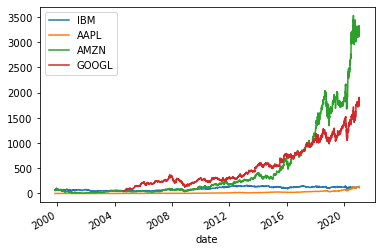

In [48]:
df_av_adj_close.plot(legend=True)

In [61]:
googl_init_val = df_av_googl_ac[df_av_googl_ac.last_valid_index()]

so every value before this date could be conveniently set to 0, first valid value or other values. I will put it equal to first initial value:

In [69]:
df_av_adj_close['GOOGL'].fillna(googl_init_val, inplace=True)

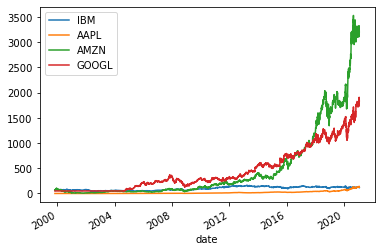

In [70]:
df_av_adj_close.plot(legend=True)

I will try to pair plot them in order to spot any correlation between the stocks:

In [72]:
import seaborn as sns

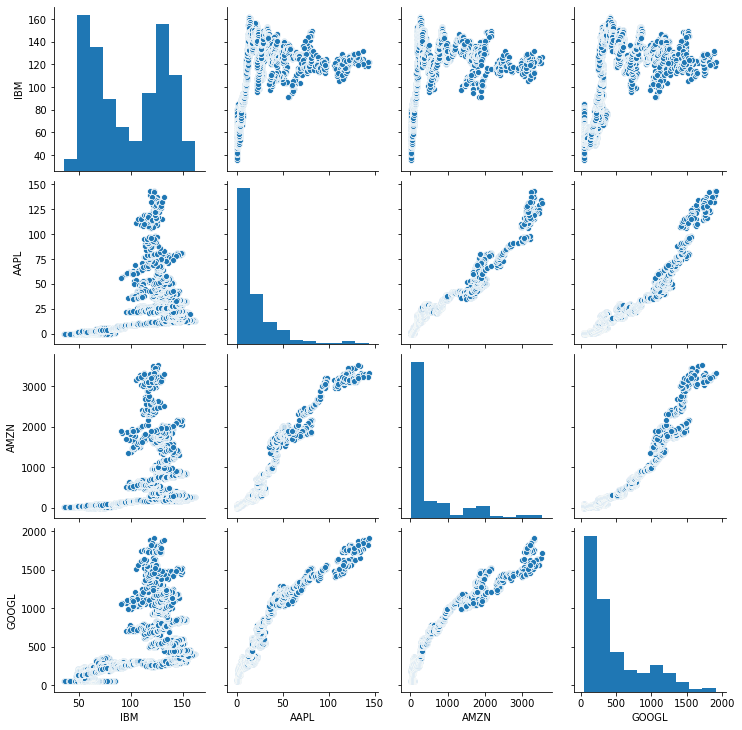

In [73]:
sns.pairplot(df_av_adj_close)

#### Alpha vantage Finance data plot:

### SMA

For each of the symbols, a simple moving average could be calculated, in order to do so 4 new dataframe will be created, containing the moving average of each symbol.

first setting window size:

In [63]:
ws = 7

In [64]:
ibm_ma = df_av_ibm['adjusted close'].rolling(window=ws).mean()
df_av_ibm['adjusted close moving average'] = ibm_ma

In [65]:
df_av_ibm.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,adjusted close moving average
1999-11-01,98.50,98.81,96.37,96.75,61.535122,9551800,0.0,1.0,NaN
1999-11-02,96.75,96.81,93.69,94.81,60.301239,11105400,0.0,1.0,NaN
1999-11-03,95.87,95.94,93.50,94.37,60.021389,10369100,0.0,1.0,NaN
1999-11-04,94.44,94.44,90.00,91.56,58.234168,16697600,0.0,1.0,NaN
1999-11-05,92.75,92.94,90.19,90.25,57.400979,13737600,0.0,1.0,NaN


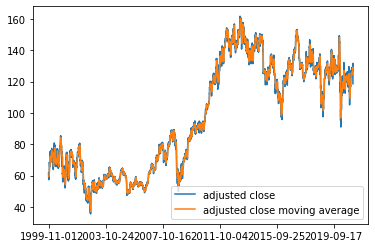

In [66]:
df_av_ibm['adjusted close'].plot(legend=True)
df_av_ibm['adjusted close moving average'].plot(legend=True)

In [45]:
ibm_ma.describe()

count    5335.000000
mean       97.515987
std        34.626072
min        37.188993
25%        63.238077
50%        92.002136
75%       129.347802
max       160.227180
Name: adjusted close, dtype: float64

Computing metrics on the moving average

In [50]:
from sklearn.metrics import mean_squared_error

In [28]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import datetime
import pyflux